In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.api.types import is_string_dtype

In [2]:
se = pd.read_csv(r"C:\Users\Asus\Documents\Coding\SET code\SOMC\After Discuss\SET 50 Historical Data (7).csv")
se

,Date,Price,Open,High,Low,Vol.,Change %
0,03/31/2025,739.77,737.73,747.03,737.73,1.64B,-1.46%
1,03/28/2025,750.73,756.71,756.88,748.76,894.66M,-1.10%
2,03/27/2025,759.10,759.32,762.76,756.82,1.39B,-0.03%
3,03/26/2025,759.36,756.45,762.84,756.45,1.15B,0.55%
4,03/25/2025,755.22,758.42,758.72,750.91,1.28B,-0.40%
...,...,...,...,...,...,...,...
1269,01/08/2020,"1,057.19","1,063.94","1,066.77","1,054.24",1.97B,-1.66%
1270,01/07/2020,"1,075.07","1,071.20","1,075.20","1,062.78",1.58B,1.06%
1271,01/06/2020,"1,063.83","1,072.49","1,074.50","1,061.17",2.03B,-1.45%
1272,01/03/2020,"1,079.50","1,081.12","1,086.71","1,077.32",1.48B,-0.14%


In [3]:
se['Date'] = pd.to_datetime(se['Date']) 
se.set_index('Date', inplace=True)       

In [4]:
se

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-03-31,739.77,737.73,747.03,737.73,1.64B,-1.46%
2025-03-28,750.73,756.71,756.88,748.76,894.66M,-1.10%
2025-03-27,759.10,759.32,762.76,756.82,1.39B,-0.03%
2025-03-26,759.36,756.45,762.84,756.45,1.15B,0.55%
2025-03-25,755.22,758.42,758.72,750.91,1.28B,-0.40%
...,...,...,...,...,...,...
2020-01-08,"1,057.19","1,063.94","1,066.77","1,054.24",1.97B,-1.66%
2020-01-07,"1,075.07","1,071.20","1,075.20","1,062.78",1.58B,1.06%
2020-01-06,"1,063.83","1,072.49","1,074.50","1,061.17",2.03B,-1.45%


In [5]:
file_path = r"C:\Users\Asus\Documents\Coding\SET code\SOMC\After Discuss\SET_DELTA_Groupby.xlsx"

df_price = pd.read_excel(file_path, sheet_name="Settlement Price Movement")

df_del = pd.read_excel(file_path, sheet_name="Delta Movement")
df_price

,END_DATE,NAME,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,...,2024-12-17 00:00:00,2024-12-18 00:00:00,2024-12-19 00:00:00,2024-12-20 00:00:00,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,2024-12-27 00:00:00,2024-12-30 00:00:00
0,2021-01-29,S50F21C1000,4.9,11.6,7.6,10.5,17.4,13.9,12.9,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-29,S50F21C1025,2.5,6.6,4.0,5.7,10.1,7.4,6.6,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-29,S50F21C1050,1.1,3.5,2.0,2.9,5.5,3.6,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-29,S50F21C1075,NaN,NaN,NaN,NaN,NaN,1.6,1.3,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-29,S50F21C650,272.6,302.4,289.0,304.0,326.2,323.8,324.5,329.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,2025-06-30,S50M25P875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,19.5
1410,2025-06-30,S50M25P900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.7,30.0
1411,2025-06-30,S50M25P925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.5,45.1
1412,2025-06-30,S50M25P950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,62.1


In [6]:
df_del

,index,END_DATE,NAME,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,...,2024-12-16 00:00:00,2024-12-17 00:00:00,2024-12-18 00:00:00,2024-12-19 00:00:00,2024-12-20 00:00:00,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,2024-12-27 00:00:00
0,0,2020-01-31,S50F20C1000,0.9914,0.9927,0.9730,0.9869,0.9444,0.9736,0.9794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-01-31,S50F20C1025,0.9519,0.9551,0.8767,0.9306,0.8110,0.8933,0.9053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-01-31,S50F20C1050,0.8165,0.8156,0.6529,0.7655,0.5722,0.7113,0.7209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-01-31,S50F20C1075,0.5596,0.5439,0.3607,0.4924,0.3076,0.4537,0.4495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-01-31,S50F20C1100,0.2785,0.2539,0.1377,0.2276,0.1205,0.2190,0.2050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,1803,2025-06-30,S50M25P875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3388
1804,1804,2025-06-30,S50M25P900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4548
1805,1805,2025-06-30,S50M25P925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5710
1806,1806,2025-06-30,S50M25P950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.6778


In [7]:
df_del['END_DATE'] = pd.to_datetime(df_del['END_DATE'])
end_date_dict = df_del.groupby('END_DATE')['NAME'].unique().apply(list).to_dict()


In [8]:
for i, (end_date, sub_df) in enumerate(df_del.groupby('END_DATE'), start=1):
    globals()[f"df_del_{i}"] = sub_df.reset_index(drop=True)

In [9]:
df_del_vars = [name for name in globals() if name.startswith('df_del_') and name[8:].isdigit()]
sorted_indices = sorted([int(name.split('_')[-1]) for name in df_del_vars])
print("ลำดับ i ที่มีอยู่:", sorted_indices)

ลำดับ i ที่มีอยู่: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


In [10]:
for i in range(1, 67):
    df = globals()[f'df_del_{i}']

    # 1. Drop columns that are entirely NaN BEFORE melt
    df = df.dropna(axis=1, how='all')

    # 2. Melt: convert wide to long
    df_melted = df.melt(id_vars=['END_DATE', 'NAME'], var_name='Date', value_name='Price')

    # 3. Convert Date to datetime
    df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')

    # 4. Pivot: Date as row index, NAME as column
    df_pivoted = df_melted.pivot(index='Date', columns='NAME', values='Price')

    # 5. Sort for neatness
    df_pivoted = df_pivoted.sort_index().sort_index(axis=1)

    # 6. Save back to globals
    globals()[f'df_del_{i}'] = df_pivoted


C:\Users\Asus\AppData\Local\Temp\ipykernel_20416\1937981542.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
C:\Users\Asus\AppData\Local\Temp\ipykernel_20416\1937981542.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
C:\Users\Asus\AppData\Local\Temp\ipykernel_20416\1937981542.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
C:\Users\Asus\AppData\Local\

In [11]:
df_del_13

NAME,S50F21C1000,S50F21C1025,S50F21C1050,S50F21C1075,S50F21C650,S50F21C675,S50F21C700,S50F21C725,S50F21C750,S50F21C775,...,S50F21P750,S50F21P775,S50F21P800,S50F21P825,S50F21P850,S50F21P875,S50F21P900,S50F21P925,S50F21P950,S50F21P975
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-28,NaN,NaN,NaN,NaN,0.9559,0.9018,0.8059,0.6690,0.5084,0.3506,...,-0.4821,-0.6398,-0.7718,-0.8670,-0.9273,NaN,NaN,NaN,NaN,NaN
2020-10-29,NaN,NaN,NaN,NaN,0.9520,0.8922,0.7877,0.6419,0.4757,0.3178,...,-0.5148,-0.6727,-0.7996,-0.8873,-0.9401,NaN,NaN,NaN,NaN,NaN
2020-10-30,NaN,NaN,NaN,NaN,0.9475,0.8813,0.7676,0.6129,0.4419,0.2853,...,-0.5487,-0.7052,-0.8259,-0.9055,-0.9511,NaN,NaN,NaN,NaN,NaN
2020-11-02,NaN,NaN,NaN,NaN,0.9591,0.9028,0.7986,0.6479,0.4734,0.3083,...,-0.5175,-0.6826,-0.8126,-0.8993,-0.9489,NaN,NaN,NaN,NaN,NaN
2020-11-03,NaN,NaN,NaN,NaN,0.9679,0.9271,0.8488,0.7282,0.5761,0.4157,...,-0.4152,-0.5755,-0.7190,-0.8296,-0.9041,-0.9484,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,0.0458,0.0085,0.001,0.0001,0.9996,0.9996,0.9996,0.9996,0.9996,0.9996,...,0.0000,0.0000,0.0000,-0.0001,-0.0031,-0.0278,-0.1255,-0.3382,-0.6148,-0.8388
2021-01-25,0.0179,0.0007,0.000,0.0000,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0048,-0.0646,-0.2747,-0.6113,-0.8776
2021-01-26,0.0246,0.0002,0.000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0182,-0.1556,-0.4844,-0.8236


In [12]:
for i in range(1, 67):
    var_name = f'df_del_{i}'
    if var_name in globals():
        df = globals()[var_name]
        if df.empty:
            print(f"{var_name} Emp ❌")
        else:
            print(f"{var_name} Have ✅")

df_del_1 Have ✅
df_del_2 Have ✅
df_del_3 Have ✅
df_del_4 Have ✅
df_del_5 Have ✅
df_del_6 Have ✅
df_del_7 Have ✅
df_del_8 Have ✅
df_del_9 Have ✅
df_del_10 Have ✅
df_del_11 Have ✅
df_del_12 Have ✅
df_del_13 Have ✅
df_del_14 Have ✅
df_del_15 Have ✅
df_del_16 Have ✅
df_del_17 Have ✅
df_del_18 Have ✅
df_del_19 Have ✅
df_del_20 Have ✅
df_del_21 Have ✅
df_del_22 Have ✅
df_del_23 Have ✅
df_del_24 Have ✅
df_del_25 Have ✅
df_del_26 Have ✅
df_del_27 Have ✅
df_del_28 Have ✅
df_del_29 Have ✅
df_del_30 Have ✅
df_del_31 Have ✅
df_del_32 Have ✅
df_del_33 Have ✅
df_del_34 Have ✅
df_del_35 Have ✅
df_del_36 Have ✅
df_del_37 Have ✅
df_del_38 Have ✅
df_del_39 Have ✅
df_del_40 Have ✅
df_del_41 Have ✅
df_del_42 Have ✅
df_del_43 Have ✅
df_del_44 Have ✅
df_del_45 Have ✅
df_del_46 Have ✅
df_del_47 Have ✅
df_del_48 Have ✅
df_del_49 Have ✅
df_del_50 Have ✅
df_del_51 Have ✅
df_del_52 Have ✅
df_del_53 Have ✅
df_del_54 Have ✅
df_del_55 Have ✅
df_del_56 Have ✅
df_del_57 Have ✅
df_del_58 Have ✅
df_del_59 Have ✅
df_del

In [13]:
def extract_strike(name):
    match = re.search(r'(\d+)$', name)
    return float(match.group(1)) if match else np.nan

In [14]:
for i in range(1, 66):
    name = f'df_del_{i}'
    if name in globals():
        df = globals()[name].copy()  # สำรองข้อมูล

        # สร้าง mapping: column → strike
        strike_map = {col: extract_strike(col) for col in df.columns}

        # แปลงราคาเป็น strike โดยไม่แตะ NaN
        for col in df.columns:
            strike = strike_map[col]
            df[col] = df[col].apply(lambda x: strike if pd.notna(x) else np.nan)

        # เขียนกลับเข้า globals
        globals()[f'{name}_1'] = df

In [15]:
for i in range(1, 66):
    df_main = globals().get(f"df_del_{i}")
    df_compare = globals().get(f"df_del_{i}_1")

    if df_main is None or df_compare is None:
        print(f"⚠️ df_del_{i} หรือ df_del_{i}_1 ไม่มีอยู่")
        continue

    if df_main.shape == df_compare.shape:
        print(f"✅ df_del_{i} เท่ากับ df_del_{i}_1")
    else:
        print(f"❌ df_del_{i} และ df_del_{i}_1 ขนาดต่างกัน: {df_main.shape} vs {df_compare.shape}")


✅ df_del_1 เท่ากับ df_del_1_1
✅ df_del_2 เท่ากับ df_del_2_1
✅ df_del_3 เท่ากับ df_del_3_1
✅ df_del_4 เท่ากับ df_del_4_1
✅ df_del_5 เท่ากับ df_del_5_1
✅ df_del_6 เท่ากับ df_del_6_1
✅ df_del_7 เท่ากับ df_del_7_1
✅ df_del_8 เท่ากับ df_del_8_1
✅ df_del_9 เท่ากับ df_del_9_1
✅ df_del_10 เท่ากับ df_del_10_1
✅ df_del_11 เท่ากับ df_del_11_1
✅ df_del_12 เท่ากับ df_del_12_1
✅ df_del_13 เท่ากับ df_del_13_1
✅ df_del_14 เท่ากับ df_del_14_1
✅ df_del_15 เท่ากับ df_del_15_1
✅ df_del_16 เท่ากับ df_del_16_1
✅ df_del_17 เท่ากับ df_del_17_1
✅ df_del_18 เท่ากับ df_del_18_1
✅ df_del_19 เท่ากับ df_del_19_1
✅ df_del_20 เท่ากับ df_del_20_1
✅ df_del_21 เท่ากับ df_del_21_1
✅ df_del_22 เท่ากับ df_del_22_1
✅ df_del_23 เท่ากับ df_del_23_1
✅ df_del_24 เท่ากับ df_del_24_1
✅ df_del_25 เท่ากับ df_del_25_1
✅ df_del_26 เท่ากับ df_del_26_1
✅ df_del_27 เท่ากับ df_del_27_1
✅ df_del_28 เท่ากับ df_del_28_1
✅ df_del_29 เท่ากับ df_del_29_1
✅ df_del_30 เท่ากับ df_del_30_1
✅ df_del_31 เท่ากับ df_del_31_1
✅ df_del_32 เท่ากับ df_del

In [16]:
otm_dict_all = {}

for i in range(1, 67):
    var_name = f'df_del_{i}'
    if var_name not in globals():
        continue

    df = globals()[var_name]
    if df.empty:
        continue

    for date, row in df.iterrows():
        otm_names = []
        for name, delta in row.items():
            if pd.isna(delta):
                continue
            if 'C' in name and (0 <= delta <= 0.5):
                otm_names.append(name)
            elif 'P' in name and (-0.5 <= delta <= 0):
                otm_names.append(name)

        if date in otm_dict_all:
            otm_dict_all[date].extend(otm_names)
        else:
            otm_dict_all[date] = otm_names


In [17]:
otm_dict_all

{Timestamp('2020-01-02 00:00:00'): ['S50F20C1100',
  'S50F20C1125',
  'S50F20C1150',
  'S50F20P1000',
  'S50F20P1025',
  'S50F20P1050',
  'S50F20P1075',
  'S50G20C1100',
  'S50G20C1125',
  'S50G20P1000',
  'S50G20P1025',
  'S50G20P1050',
  'S50G20P1075',
  'S50H20C1100',
  'S50H20C1125',
  'S50H20C1150',
  'S50H20P1000',
  'S50H20P1025',
  'S50H20P1050',
  'S50H20P1075',
  'S50M20C1075',
  'S50M20C1100',
  'S50M20C1125',
  'S50M20P1025',
  'S50M20P1050',
  'S50M20P1075'],
 Timestamp('2020-01-03 00:00:00'): ['S50F20C1100',
  'S50F20C1125',
  'S50F20C1150',
  'S50F20P1000',
  'S50F20P1025',
  'S50F20P1050',
  'S50F20P1075',
  'S50G20C1100',
  'S50G20C1125',
  'S50G20P1000',
  'S50G20P1025',
  'S50G20P1050',
  'S50G20P1075',
  'S50H20C1100',
  'S50H20C1125',
  'S50H20C1150',
  'S50H20P1000',
  'S50H20P1025',
  'S50H20P1050',
  'S50H20P1075',
  'S50M20C1075',
  'S50M20C1100',
  'S50M20C1125',
  'S50M20P1025',
  'S50M20P1050',
  'S50M20P1075'],
 Timestamp('2020-01-06 00:00:00'): ['S50F20C10

In [18]:
se['Price'] = se['Price'].replace(',', '', regex=True)
se['Price'] = pd.to_numeric(se['Price'], errors='coerce')

In [68]:
loss_summary_list = []

for date, otm_names in otm_dict_all.items():
    try:
        spot = se.loc[date, 'Price']
    except KeyError:
        continue

    losses = []

    for name in otm_names:
        found = False
        for i in range(1, 67):
            try:
                df_strike = globals()[f'df_del_{i}_1']
                K = df_strike.loc[date, name]
                found = True
                break  # เจอแล้วไม่ต้อง loop ต่อ
            except (KeyError, ValueError):
                continue

        if not found or pd.isna(K):
            continue

        if 'C' in name:
            payoff = min(spot - K, 0)
        elif 'P' in name:
            payoff = min(K - spot, 0)
        else:
            continue
        losses.append(payoff)

    if len(losses) == 0:
        continue

    summary = {
        'Date': date,
        'Min': np.min(losses),
        'Median': np.median(losses),
        'Avg': np.mean(losses),
        'Q3': np.percentile(losses, 75),
        'VaR_99': np.percentile(losses, 1),
        'Max': np.max(losses)
    }
    loss_summary_list.append(summary)

# ✅ สร้าง DataFrame
df_loss_summary = pd.DataFrame(loss_summary_list).set_index('Date')


In [69]:
df_loss_summary = pd.DataFrame(loss_summary_list).sort_values(by='Date').set_index('Date')

In [70]:
df_loss_summary

,Min,Median,Avg,Q3,VaR_99,Max
Date,,,,,,
2020-01-02,-81.00,-37.50,-38.653846,-19.00,-81.00,0.00
2020-01-03,-79.50,-37.50,-38.365385,-20.50,-79.50,0.00
2020-01-06,-86.17,-38.83,-40.340400,-13.83,-86.17,-11.17
2020-01-07,-75.07,-49.93,-39.002800,-24.93,-75.07,0.00
2020-01-08,-92.81,-42.81,-41.754615,-17.81,-92.81,-7.19
...,...,...,...,...,...,...
2024-12-23,-199.93,-75.07,-77.836792,-25.07,-186.93,0.00
2024-12-24,-204.44,-79.44,-81.143529,-45.56,-191.94,-4.44
2024-12-25,-207.17,-82.17,-81.304118,-42.83,-194.67,-7.17


In [22]:
check = df_loss_summary['VaR_99'] == df_loss_summary['Min']
true_count = check.sum()
false_count = (~check).sum()

print(f"✅ VaR_99 == Min: {true_count} วัน")
print(f"❌ VaR_99 ≠ Min: {false_count} วัน")


✅ VaR_99 == Min: 654 วัน
❌ VaR_99 ≠ Min: 557 วัน


In [23]:
is_duplicated = df_loss_summary.index.duplicated()
num_duplicated = is_duplicated.sum()
print(f"🔁 จำนวน index ที่ซ้ำกัน: {num_duplicated}")

🔁 จำนวน index ที่ซ้ำกัน: 0


In [24]:
df_loss_summary[df_loss_summary.isnull().any(axis=1)]

,Min,Median,Avg,Q3,VaR_99,Max
Date,,,,,,


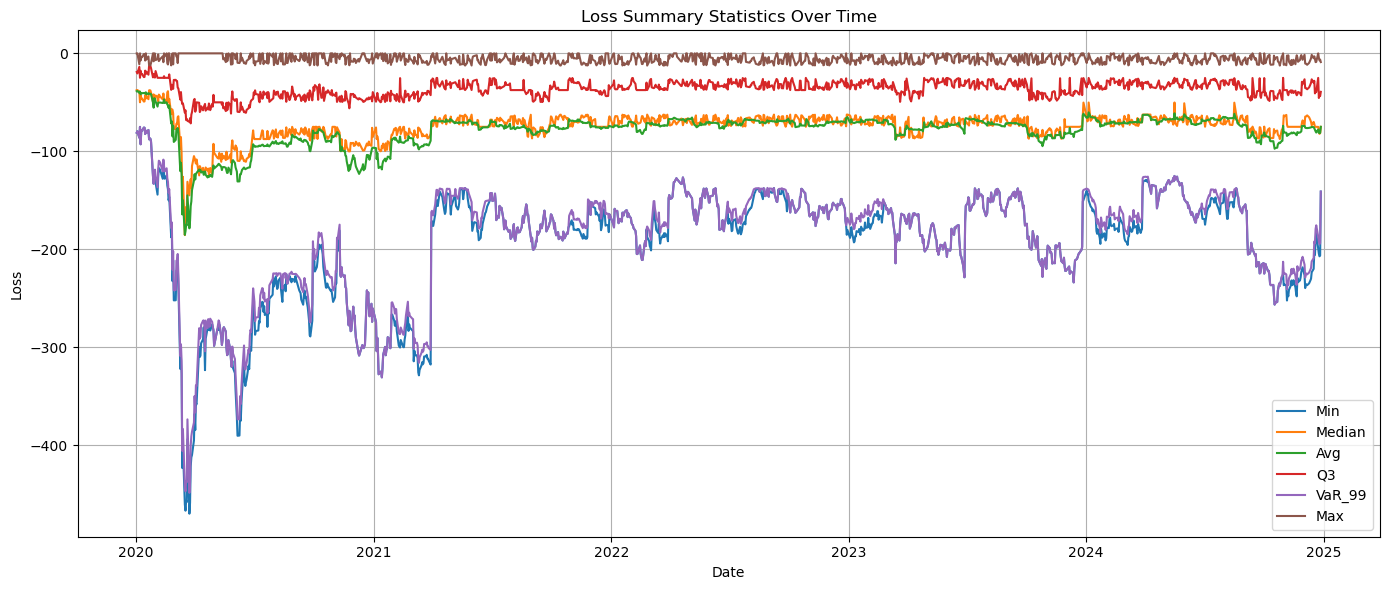

In [74]:
plt.figure(figsize=(14, 6))


plt.plot(df_loss_summary.index, df_loss_summary['Min'], label='Min')
plt.plot(df_loss_summary.index, df_loss_summary['Median'], label='Median')
plt.plot(df_loss_summary.index, df_loss_summary['Avg'], label='Avg')
plt.plot(df_loss_summary.index, df_loss_summary['Q3'], label='Q3')
plt.plot(df_loss_summary.index, df_loss_summary['VaR_99'], label='VaR_99')
plt.plot(df_loss_summary.index, df_loss_summary['Max'], label='Max')


plt.title('Loss Summary Statistics Over Time')
plt.xlabel('Date')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

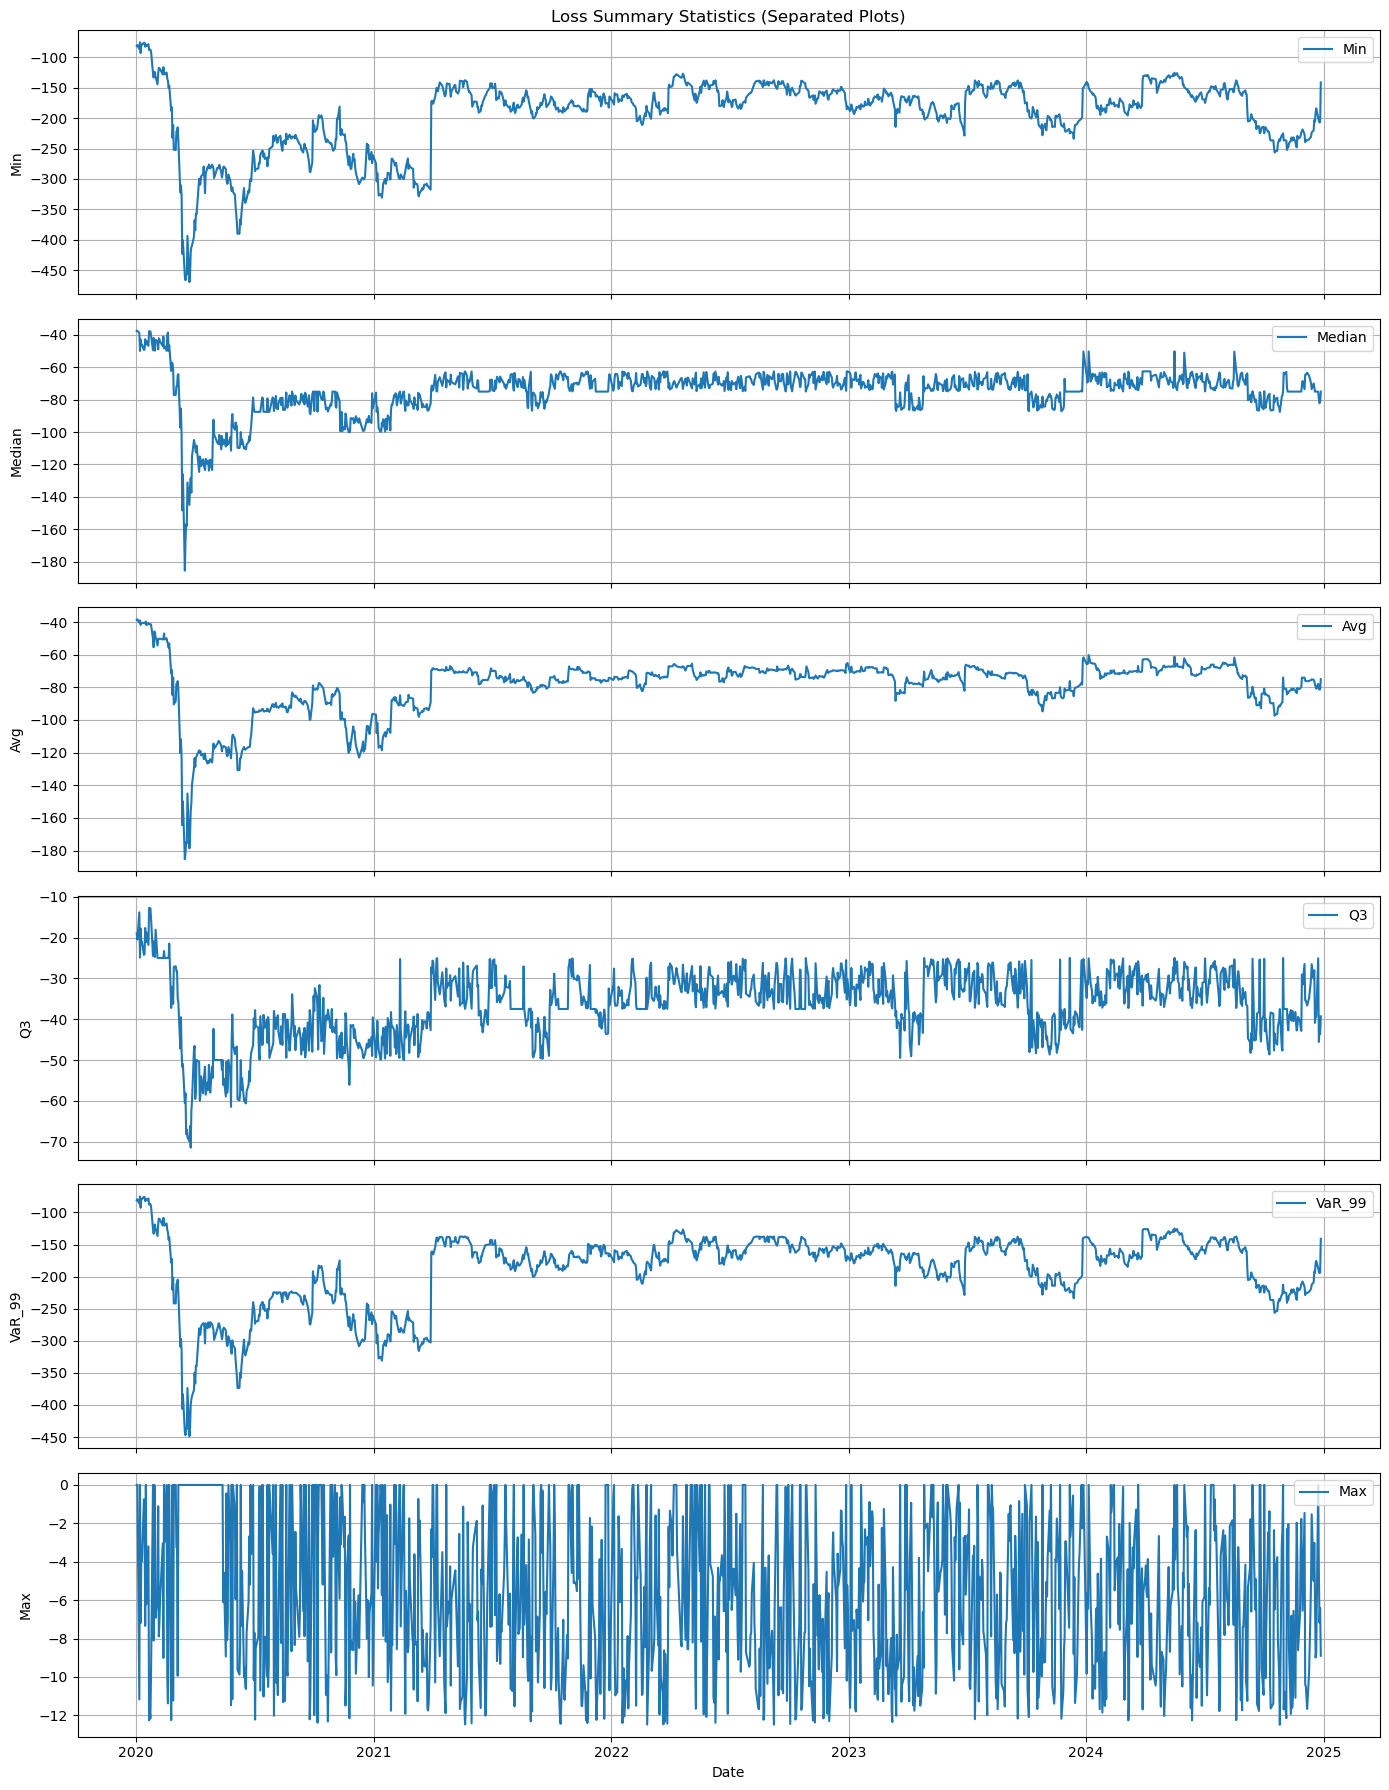

In [76]:
cols = ['Min', 'Median', 'Avg', 'Q3', 'VaR_99', 'Max']
n = len(cols)

fig, axes = plt.subplots(n, 1, figsize=(14, 3 * n), sharex=True)


for i, col in enumerate(cols):
    axes[i].plot(df_loss_summary.index, df_loss_summary[col], label=col, color='tab:blue')
    axes[i].set_ylabel(col)
    axes[i].grid(True)
    axes[i].legend(loc='upper right')

axes[0].set_title('Loss Summary Statistics (Separated Plots)')
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()
